<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM3/AI_at_Scale/Assignments/Assignment3_4/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip  install torch matplotlib numpy pandas scikit-learn transformers datasets accelerate
! pip install -U scikit-learn

  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
  Using cached datasets-2.13.2-py3-none-any.whl (512 kB)
  Using cached accelerate-0.20.3-py3-none-any.whl (227 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.5-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached safetensors-0.5.3.tar.gz (67 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      ERROR: Ignored the following versions that require a different python version: 0.1.0 Requires-Python >=3.9; 0.1.1 R

In [ ]:
import torch


In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
import torchvision
from torchvision.transforms import transforms
from torchvision.datasets import CIFAR10
from torchvision import models
from torchvision import datasets, transforms
import numpy as np

from pyspark.sql import SparkSession, Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import time


# from collections import Counter

In [ ]:
# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torchvision.__version__)
print(f"Using device: {device}")

0.14.1+cu117
Using device: cuda


Q1 - Showing plot and visualize data

In [ ]:
%pip install matplotlib

from torchvision.datasets import CIFAR10

# import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Download datasets
trainset = CIFAR10(root='./data', train=True, download=True)
testset = CIFAR10(root='./data', train=False, download=True)

import random
# Select random images from the training set
# Select random subset indices
train_indices = random.sample(range(len(trainset)), 10000)
test_indices = random.sample(range(len(testset)), 500)

# Create subset datasets
subset_train = [trainset[i] for i in train_indices]
subset_test = [testset[i] for i in test_indices]

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
subset_test[:15]
# this is a tuple of image and label

[(<PIL.Image.Image image mode=RGB size=32x32>, 0),
 (<PIL.Image.Image image mode=RGB size=32x32>, 7),
 (<PIL.Image.Image image mode=RGB size=32x32>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32>, 2),
 (<PIL.Image.Image image mode=RGB size=32x32>, 8),
 (<PIL.Image.Image image mode=RGB size=32x32>, 7),
 (<PIL.Image.Image image mode=RGB size=32x32>, 8),
 (<PIL.Image.Image image mode=RGB size=32x32>, 7),
 (<PIL.Image.Image image mode=RGB size=32x32>, 8),
 (<PIL.Image.Image image mode=RGB size=32x32>, 0),
 (<PIL.Image.Image image mode=RGB size=32x32>, 2),
 (<PIL.Image.Image image mode=RGB size=32x32>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32>, 6),
 (<PIL.Image.Image image mode=RGB size=32x32>, 8),
 (<PIL.Image.Image image mode=RGB size=32x32>, 2)]

In [ ]:
# Getting all labels from subset_train

class_labels = [labels for x,labels in subset_train]

# typecasting to set to get unique classes
unique_classes = set(class_labels)
print(f"Unique classes in subset_train: {unique_classes}")

Unique classes in subset_train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Plot the class distribution in the complete train and test datasets.

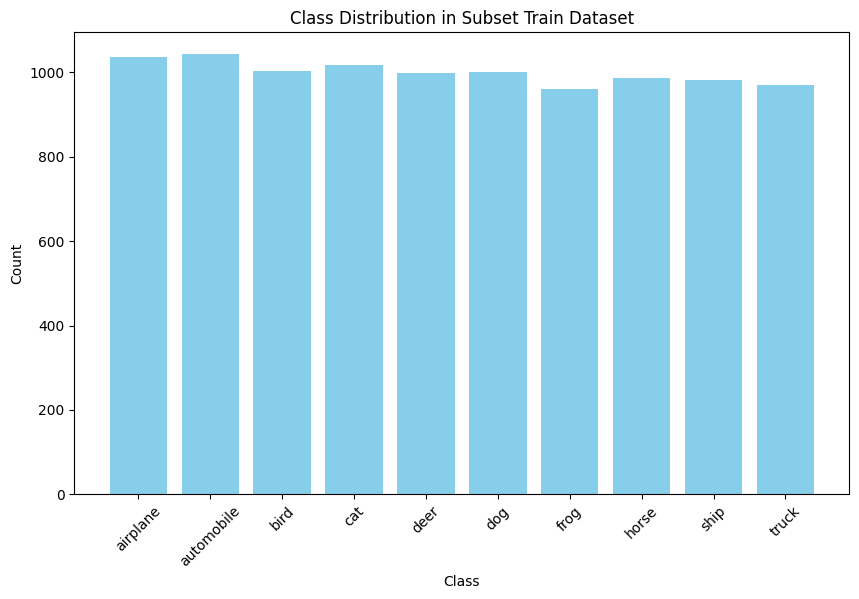

In [ ]:
# #CIFAR 10 has 10 clsses 0 to 9

# counts = Counter(class_labels)

# class_names = trainset.classes

# x = [class_names[i] for i in range(10)]  # 10 class names
# y = [counts[i] for i in range(10)]   # counts of each class in the subset train dataset

# # drawing class plots


# plt.figure(figsize=(10, 6))
# plt.bar(x, y,color='skyblue')
# plt.title("Class Distribution in Subset Train Dataset")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()

Plot the class distribution in the selected subset of the train and test datasets.

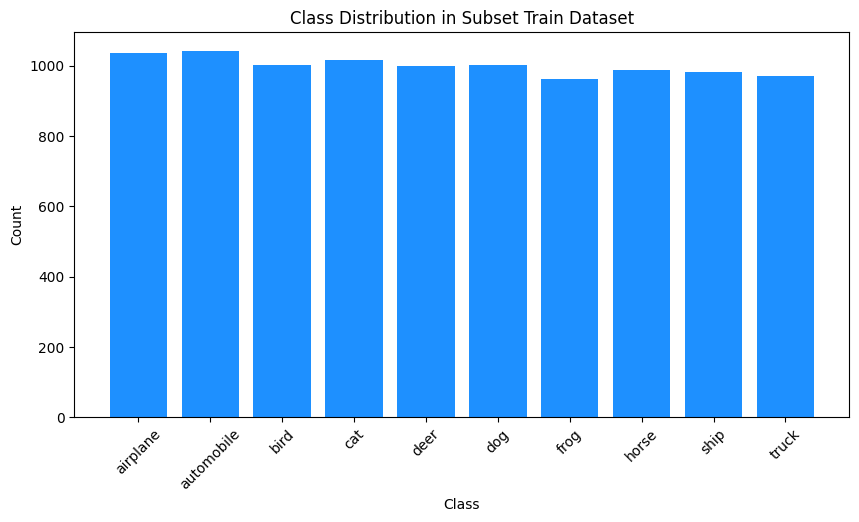

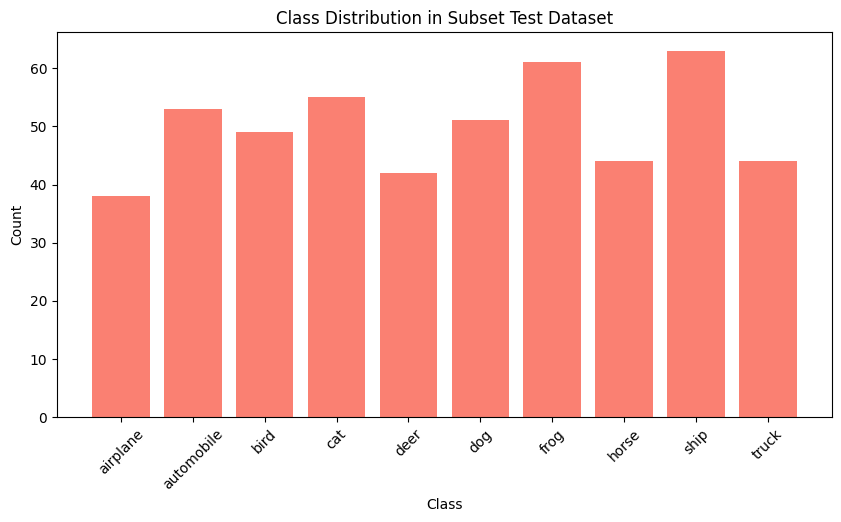

In [ ]:
# import matplotlib.pyplot as plt
# from collections import Counter

# # Get labels from subset_train and subset_test
# subset_train_labels = [label for _, label in subset_train]
# subset_test_labels = [label for _, label in subset_test]

# # Count occurrences for each class
# train_counts = Counter(subset_train_labels)
# test_counts = Counter(subset_test_labels)

# class_names = trainset.classes

# # Prepare data for plotting
# x = [class_names[i] for i in range(10)]
# y_train = [train_counts[i] for i in range(10)]
# y_test = [test_counts[i] for i in range(10)]

# # Plot for subset_train
# plt.figure(figsize=(10, 5))
# plt.bar(x, y_train, color='dodgerblue')
# plt.title("Class Distribution in Subset Train Dataset")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()

# # Plot for subset_test
# plt.figure(figsize=(10, 5))
# plt.bar(x, y_test, color='salmon')
# plt.title("Class Distribution in Subset Test Dataset")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()

# part 2 Feature extraction

In [ ]:
#  extract features from the CIFAR-10 dataset.

model = models.mobilenet_v2(pretrained=True)

####################################################################################

# transforming  to required size and normalizing

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],           # Average pixel intensity in the Red, Green, Blue channels across the entire ImageNet training set.
                         std=[0.229, 0.224, 0.225])            # Standard deviation of pixel intensities in each channel (also after scaling to 0–1 range).
])


# seperating the train and test datasets into dataloaders

# Re-create datasets with transform
trainset_fe = datasets.CIFAR10(root='data', train=True, download=False, transform=transform)
testset_fe  = datasets.CIFAR10(root='data', train=False, download=False, transform=transform)





/home/aymuos/miniconda3/envs/bigdl_class/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/home/aymuos/miniconda3/envs/bigdl_class/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Load MobileNetV2 pretrained on ImageNet
from torchvision import models
mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

# Remove the classification head
mobilenet.classifier = torch.nn.Identity()

mobilenet = mobilenet.to(device)
mobilenet.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
import random

def extract_random_features(dataset, sample_size):
    # Get random indices
    indices = list(range(len(dataset)))
    random.shuffle(indices)
    indices = indices[:sample_size]

    features_list, labels_list = [], []
    with torch.no_grad():
        for idx in indices:
            img, label = dataset[idx]
            img = img.unsqueeze(0).to(device)
            feat = mobilenet(img).cpu().numpy()
            features_list.append(feat[0])
            labels_list.append(label)
    return np.array(features_list), np.array(labels_list)

# Use random samples instead of first few
train_features, train_labels = extract_random_features(trainset_fe, 10000)
test_features, test_labels = extract_random_features(testset_fe, 500)

print("Train features:", train_features.shape)
print("Test features:", test_features.shape)


Train features: (10000, 1280)
Test features: (500, 1280)


----------------------------------------------------------------

List the available classifiers in the Spark ML library that can be used to build
classifiers using the extracted features.

----------------------------------------------------------------

In [ ]:
from pyspark.sql import SparkSession

# SPARK INITIALIZATION ##############################################
student_id = "CH24M571"  # your roll number, letters must be in capital letter
app_name = student_id + "_Assignment_3_4"
assignment_no = "Assignment_3_4"

# spark = SparkSession.builder \
#     .appName(app_name) \
#     .config("spark.executor.memory", "10G") \
#     .config("spark.executor.cores", "6") \
#     .config("spark.cores.max", "6") \
#     .getOrCreate()


#########################################################################


# from pyspark.ml.linalg import Vectors
# # convert into (Vectors.dense(...), label) tuples
# data_tuples = [(Vectors.dense(x.tolist()), int(y)) for x,y in zip(train_features, train_labels)]
# train_spark_df = spark.createDataFrame(data_tuples, ["features", "label"])

# same for test


In [ ]:
# lISTING ALL AVAILABLE CLASSIFIERS IN SPARK ML LIBRARY

from pyspark.ml import classification

# List all classes in the classification module
available_classifiers = [f"{cls}" for cls in dir(classification) if not cls.startswith("_") and cls.endswith("Classifier")]
print(available_classifiers)


['Classifier', 'DecisionTreeClassifier', 'FMClassifier', 'GBTClassifier', 'MultilayerPerceptronClassifier', 'ProbabilisticClassifier', 'RandomForestClassifier']


---------------------------------------------------

SELECTING 3 MODELS

1. LOgistic Regression - baseline linear model - quite possibly the simplest model
2. RandomForestClassifier - tree based classifier  -- using this to capture non-linear relationships  
3. Naive Bayes classifier -- probabilistic model - main reason to choose this is the speed .. expected will perform worse than GBT

---------------------------------------------------

-----------------------------------------------------

In [ ]:
# FUNCTION TO CREATE SPARK SESSION




def create_spark_session(app_name, executor_memory="10G", executor_cores=6, cores_max=6):
    """
    Create a Spark session with specified configurations.

    Parameters:
    - app_name: Name of the Spark application.
    - executor_memory: Memory allocated for each executor.
    - executor_cores: Number of cores allocated for each executor.
    - cores_max: Maximum number of cores to use across all executors.

    Returns:
    - SparkSession object.
    """
    spark = SparkSession.builder \
        .appName(app_name) \
        .config("spark.executor.memory", executor_memory) \
        .config("spark.executor.cores", executor_cores) \
        .config("spark.cores.max", cores_max) \
        .config("spark.sql.shuffle.partitions", "200") \
        .config("spark.default.parallelism", "200") \
        .getOrCreate()

    return spark




# FUNCTION TO SELECT MODELS

def to_spark_df(spark, features, labels):
    rows = [Row(features=Vectors.dense(f.tolist()), label=float(l))
            for f, l in zip(features, labels)]
    return spark.createDataFrame(rows)


#FUNCTION TO TRAIN AND EVALUATE MODELS

def train_and_evaluate(train_df, test_df):
    evaluator_acc = MulticlassClassificationEvaluator(metricName="accuracy")
    evaluator_f1 = MulticlassClassificationEvaluator(metricName="f1")

    results = []

    # Logistic Regression
    lr = LogisticRegression(maxIter=50, regParam=0.01)
    start = time.time()
    lr_model = lr.fit(train_df)
    lr_preds = lr_model.transform(test_df)
    duration = time.time() - start
    results.append(("Logistic Regression",
                    evaluator_acc.evaluate(lr_preds),
                    evaluator_f1.evaluate(lr_preds),
                    duration))

    # Random Forest Classifier
    rf = RandomForestClassifier(numTrees=50, maxDepth=10)
    start = time.time()
    rf_model = rf.fit(train_df)
    rf_preds = rf_model.transform(test_df)
    duration = time.time() - start
    results.append(("Random Forest",
                    evaluator_acc.evaluate(rf_preds),
                    evaluator_f1.evaluate(rf_preds),
                    duration))

    # Naive Bayes
    nb = NaiveBayes(smoothing=1.0, modelType="multinomial")
    start = time.time()
    nb_model = nb.fit(train_df)
    nb_preds = nb_model.transform(test_df)
    duration = time.time() - start
    results.append(("Naive Bayes",
                    evaluator_acc.evaluate(nb_preds),
                    evaluator_f1.evaluate(nb_preds),
                    duration))

    return results



Running spark configurations

In [ ]:
configs = [
    {"executor_cores": 2, "max_cores": 4, "executor_memory": "4g"},
    {"executor_cores": 4, "max_cores": 8, "executor_memory": "8g"},
    {"executor_cores": 2, "max_cores": 8, "executor_memory": "10g"}
]

all_results = []

for i, cfg in enumerate(configs, start=1):
    print(f"\n=== Running Configuration {i}: {cfg} ===")

    spark = create_spark_session(
        app_name=f"{app_name}-{i}",
        executor_cores=cfg["executor_cores"],
        cores_max=cfg["max_cores"],
        executor_memory=cfg["executor_memory"],

    )

    # Convert data to Spark DF
    train_df = to_spark_df(spark, train_features, train_labels).repartition(200)
    test_df = to_spark_df(spark, test_features, test_labels).repartition(200)

    # Train and evaluate
    results = train_and_evaluate(train_df, test_df)
    all_results.append((cfg, results))

    spark.stop()


=== Running Configuration 1: {'executor_cores': 2, 'max_cores': 4, 'executor_memory': '4g'} ===


25/08/13 13:45:24 WARN TaskSetManager: Stage 110 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:45:26 WARN TaskSetManager: Stage 112 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:45:28 WARN TaskSetManager: Stage 114 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:45:28 WARN TaskSetManager: Stage 116 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:45:29 WARN TaskSetManager: Stage 118 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:45:29 WARN TaskSetManager: Stage 120 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:45:29 WARN TaskSetManager: Stage 122 contains a task of very large size (11552 KiB). The maximum recommended task size is 10

[618.744s][warning][gc,alloc] Executor task launch worker for task 0.0 in stage 223.0 (TID 1131): Retried waiting for GCLocker too often allocating 13871 words


25/08/13 13:46:08 WARN TaskSetManager: Stage 225 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:46:11 WARN TaskSetManager: Stage 227 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:46:12 WARN TaskSetManager: Stage 229 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:46:13 WARN TaskSetManager: Stage 231 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:46:15 WARN TaskSetManager: Stage 233 contains a task of very large size (11552 KiB). The maximum recommended task size is 1000 KiB.
25/08/13 13:46:18 ERROR Utils: uncaught error in thread Spark Context Cleaner, stopping SparkContext
java.lang.OutOfMemoryError: Java heap space
25/08/13 13:46:19 ERROR Utils: throw uncaught fatal error in thread Spark Context Cleaner
java.lang.OutOfMemoryError: Java heap space
E

Py4JJavaError: An error occurred while calling o451.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 233.0 failed 1 times, most recent failure: Lost task 0.0 in stage 233.0 (TID 1211) (predator executor driver): java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.ml.tree.impl.DTStatsAggregator.<init>(DTStatsAggregator.scala:77)
	at org.apache.spark.ml.tree.impl.RandomForest$.$anonfun$findBestSplits$22(RandomForest.scala:651)
	at org.apache.spark.ml.tree.impl.RandomForest$.$anonfun$findBestSplits$22$adapted(RandomForest.scala:647)
	at org.apache.spark.ml.tree.impl.RandomForest$$$Lambda$4186/0x0000729a291e3770.apply(Unknown Source)
	at scala.Array$.tabulate(Array.scala:418)
	at org.apache.spark.ml.tree.impl.RandomForest$.$anonfun$findBestSplits$21(RandomForest.scala:647)
	at org.apache.spark.ml.tree.impl.RandomForest$$$Lambda$4176/0x0000729a290e9a48.apply(Unknown Source)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:853)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:853)
	at org.apache.spark.rdd.RDD$$Lambda$2715/0x0000729a28dcdcd0.apply(Unknown Source)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:101)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.executor.Executor$TaskRunner$$Lambda$2658/0x0000729a28dc02d0.apply(Unknown Source)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:840)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2785)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2721)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2720)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2720)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1206)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2984)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2923)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2912)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:971)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2263)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2284)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2303)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2328)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1019)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1018)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$collectAsMap$1(PairRDDFunctions.scala:738)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.PairRDDFunctions.collectAsMap(PairRDDFunctions.scala:737)
	at org.apache.spark.ml.tree.impl.RandomForest$.findBestSplits(RandomForest.scala:663)
	at org.apache.spark.ml.tree.impl.RandomForest$.runBagged(RandomForest.scala:208)
	at org.apache.spark.ml.tree.impl.RandomForest$.run(RandomForest.scala:302)
	at org.apache.spark.ml.classification.RandomForestClassifier.$anonfun$train$1(RandomForestClassifier.scala:168)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.classification.RandomForestClassifier.train(RandomForestClassifier.scala:139)
	at org.apache.spark.ml.classification.RandomForestClassifier.train(RandomForestClassifier.scala:47)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:114)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:78)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:569)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:840)
Caused by: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.ml.tree.impl.DTStatsAggregator.<init>(DTStatsAggregator.scala:77)
	at org.apache.spark.ml.tree.impl.RandomForest$.$anonfun$findBestSplits$22(RandomForest.scala:651)
	at org.apache.spark.ml.tree.impl.RandomForest$.$anonfun$findBestSplits$22$adapted(RandomForest.scala:647)
	at org.apache.spark.ml.tree.impl.RandomForest$$$Lambda$4186/0x0000729a291e3770.apply(Unknown Source)
	at scala.Array$.tabulate(Array.scala:418)
	at org.apache.spark.ml.tree.impl.RandomForest$.$anonfun$findBestSplits$21(RandomForest.scala:647)
	at org.apache.spark.ml.tree.impl.RandomForest$$$Lambda$4176/0x0000729a290e9a48.apply(Unknown Source)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:853)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:853)
	at org.apache.spark.rdd.RDD$$Lambda$2715/0x0000729a28dcdcd0.apply(Unknown Source)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:101)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.executor.Executor$TaskRunner$$Lambda$2658/0x0000729a28dc02d0.apply(Unknown Source)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 57850)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/home/aymuos/miniconda3/envs/bigdl_class/lib/python3.7/site-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/aymuos/miniconda3/envs/bigdl_class/lib/python3.7/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/aymuos/miniconda3/envs/bigdl_class/lib/python3.7/site-packages/py4j/clientserver.py", line 540, in send_command
    "Error while sending or receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while sending or receiving
Traceback (most re

In [ ]:
# Running the results

print("\n===== Final Comparison =====")
for cfg, res in all_results:
    print(f"\nConfig: {cfg}")
    print("{:<20} {:<12} {:<12} {:<10}".format("Model", "Accuracy", "F1-score", "Time(s)"))
    for name, acc, f1, t in res:
        print("{:<20} {:<12.4f} {:<12.4f} {:<10.2f}".format(name, acc, f1, t))